[data](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [8]:
house = pd.read_csv('Melbourne_housing_full.csv')
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [30]:
house_sel = pd.concat([house, pd.get_dummies(house['CouncilArea'])], axis=1)
house_sel = pd.concat([house_sel, pd.get_dummies(house['Method'])], axis=1)
house_sel = pd.concat([house_sel, pd.get_dummies(house['Suburb'])], axis=1)
house_sel = pd.concat([house_sel, pd.get_dummies(house['Type'])], axis=1)
house_sel = pd.concat([house_sel, pd.get_dummies(house['Regionname'])], axis=1)
house_sel = house_sel.drop(['SellerG', 'CouncilArea', 'Method', 'Suburb', 'Address', 'Type', 'Regionname','Date'], axis=1)
house_sel = house_sel.dropna()

print(house_sel.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Columns: 417 entries, Rooms to Western Victoria
dtypes: float64(12), int64(1), uint8(404)
memory usage: 4.4 MB
None


In [31]:
X = house_sel.drop('Price', axis=1)
y = house_sel['Price']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [42]:
start_time = time.time()

params = {  'n_estimators': 500,
            'loss': 'huber',
            'learning_rate' : 0.1
}

gbr =  ensemble.GradientBoostingRegressor(**params)
gbr = gbr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

print('Training Accuracy:\n   ', gbr.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbr.score(X_test, y_test))

--- 39.38880014419556 seconds ---
Training Accuracy:
    0.8777430501188305
Testing Accuracy:
    0.8151731481792707


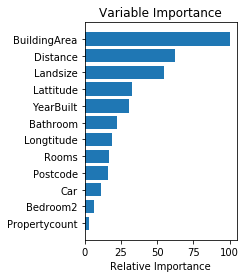

In [39]:

feature_importance = gbr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance[:12])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Building area appears to be the most important factor in determining price